We propose the use of simulated data from Bayesian prior to obfuscate the data.

Below is an example of simulating data with arbitrary sample sizes.

/tmp/ipykernel_23014/1956286977.py:5: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset =  pd.read_csv("data/wfp_food_prices_nga.csv")


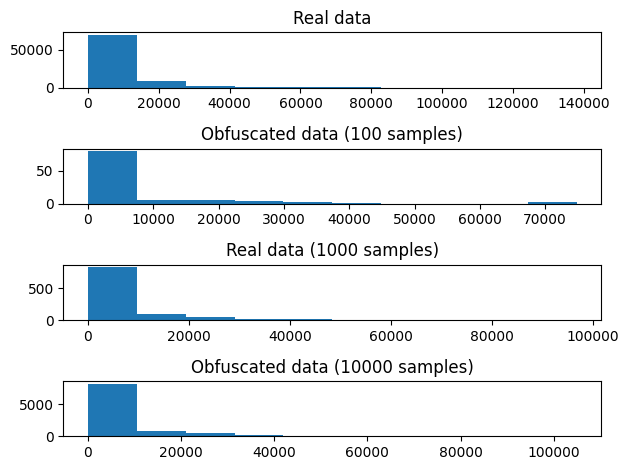

In [4]:
import matplotlib.pyplot as plt
from privacy import *

# Example usage
dataset =  pd.read_csv("data/wfp_food_prices_nga.csv")
dataset = dataset.drop(0, axis=0)
dataset["price"] = pd.to_numeric(dataset["price"])
sampling_result_100 = create_sampling_distribution(dataset["price"], 100)
sampling_result_1000 = create_sampling_distribution(dataset["price"], 1000)
sampling_result_10000 = create_sampling_distribution(dataset["price"], 10000)

fig, axs = plt.subplots(4)
# fig.suptitle('Vertically stacked subplots')
axs[0].hist(dataset["price"])
axs[0].set_title("Real data")
axs[1].hist(sampling_result_100)
axs[1].set_title("Obfuscated data (100 samples)")
axs[2].hist(sampling_result_1000)
axs[2].set_title("Real data (1000 samples)")
axs[3].hist(sampling_result_10000)
axs[3].set_title("Obfuscated data (10000 samples)")

plt.tight_layout()


Using a lambda function to serve simulation data from a Bayesian prior would allow full obfuscation of all distribution values of a given dataset. Our initial insights into this approach were promising but have since found a paper (Kazan and Reiter, 2023) that illustrates this approach at an in-depth level:

Available here:
https://arxiv.org/pdf/2306.13214.pdf

An interesting addition to the approach described by Kazan and Reiter would be to use simulated data. Notably in their section 5.1 "How much is enough? for a relative disclosed risk $r_{i}(p_{i}, q_{i})$ where

$$ 
  r^{*}(p_{i},q_{i}) \lbrace
  \begin{array}{r@{}l}
   n\widetilde{a} \text{ , if } p_{i}={1 \over n},q_{i}=1; \\
    \inf, otherwise \\
  \end{array}$$


Choosing $\epsilon$ for differential privacy" The motivating example, using a Laplacian noise shows an optimal $\epsilon$ of

$$ \epsilon = {{\Delta T}\over{\Delta v}} log ( {{(n-1) \widetilde{a}} \over {1- \widetilde{a}}} )$$

With $\epsilon \propto log(n)$, when simulating data through sampling from a posterior two objectives an be achieved:
- Protecting the value of samples for an arbitrary slice of population at any scale
- Warning systems of statistical attacks on slices of data with low samples

This is done by serving/simulating any number of samples to users for any given slice. We can then also instigate a warning system for a preset sampling of low population sample. The simulation of data for population samples of low sampling rates means that users will not be able to gain sufficient data due to the noise scaling to higher rates at these samples. We can then also warn the data custodians that users are sampling these populations with threshold warnings. THis will allow suspicious activity to be rapidly determined before statistical attacks can begin to estimate population samples effectively as they will require multiple large samples to eliminate the scaling noise in low sampled populations.

Importantly this allows for the proposed web app to continue to both collect data on small local populations of farmers in countries, and allow external analysts to conduct analytics on any slice of data without the compromisation of farmers through statistical attacks on small population samples.

A public threshold can also be used to warn external analysts about how large a population has to be before analytics can sufficiently be conducted.